### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize

### Import Dataset
https://www.kaggle.com/competitions/learn-ai-bbc/data?select=BBC+News+Test.csv

In [2]:
df = pd.read_csv("C:/Users/lekha/Downloads/BBC News Train.csv")

### Shape of Dataset

In [3]:
df.shape

(1490, 3)

### Check Information of Columns of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1490 entries, 0 to 1489

Data columns (total 3 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   ArticleId  1490 non-null   int64 

 1   Text       1490 non-null   object

 2   Category   1490 non-null   object

dtypes: int64(1), object(2)

memory usage: 35.0+ KB


### Count Values of Categories

In [5]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

### Convert Categories Name into Numerical Index

In [6]:
df['CategoryId'] = df['Category'].factorize()[0]
df.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [7]:
unique_category = df[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
unique_category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task

## Visualizing Data

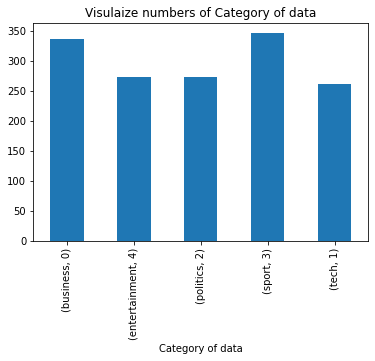

In [8]:
df.groupby('Category').CategoryId.value_counts().plot(kind = "bar")
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

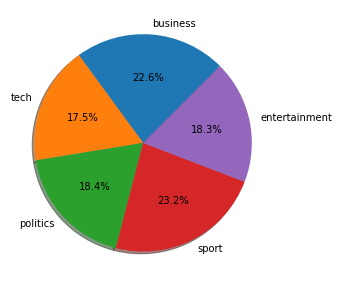

In [9]:
fig = plt.figure(figsize = (5,5))
business = df[df['CategoryId'] == 0 ]
tech = df[df['CategoryId'] == 1 ]
politics = df[df['CategoryId'] == 2]
sport = df[df['CategoryId'] == 3]
entertainment = df[df['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              startangle = 45
             )

In [10]:
stop = set(stopwords.words('english'))
business = business['Text']
tech = tech['Text']
politics = politics['Text']
sport = sport['Text']
entertainment = entertainment['Text']

In [11]:
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

business related words:


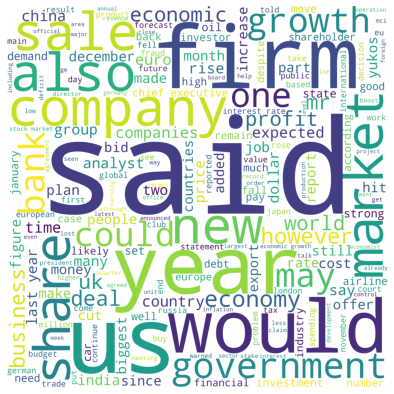

tech related words:


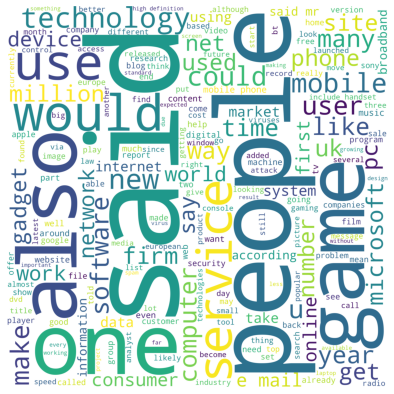

politics related words:


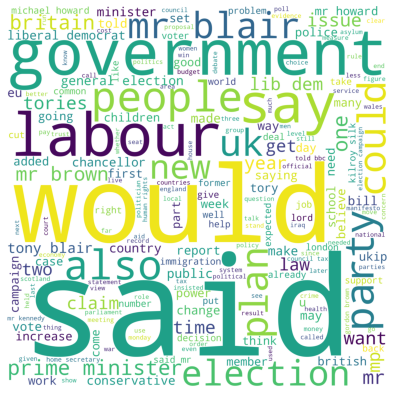

sport related words:


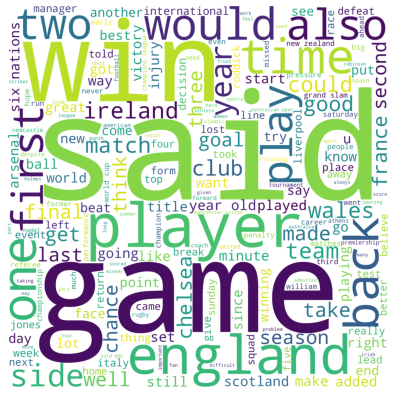

entertainment related words:


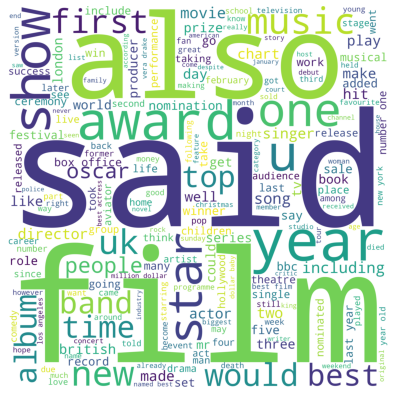

In [12]:
print("business related words:")
wordcloud_draw(business, 'white')
print("tech related words:")
wordcloud_draw(tech, 'white')
print("politics related words:")
wordcloud_draw(politics, 'white')
print("sport related words:")
wordcloud_draw(sport, 'white')
print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

In [13]:
text = df["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

In [14]:
category = df['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

## Remove All Tags

In [15]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)

df['Text'] = df['Text'].apply(remove_tags)

## Convert Everything in Lower Case

In [16]:
def convert_lower(text):
    return text.lower()

df['Text'] = df['Text'].apply(convert_lower)
df['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.

## Remove Special Characters

In [17]:
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews

df['Text'] = df['Text'].apply(special_char)

## Remove all Stopwords

In [18]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

## Lemmatizing the Words

In [19]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
df['Text'] = df['Text'].apply(lemmatize_word)
df['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

In [20]:
x = np.array(df.iloc[:,0].values)
y = np.array(df.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df.Text).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)

y.shape =  (1490,)


## Train Test and Split the Dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043

447


## Fit and Predict MultinomialNB Model

In [22]:
mdl = MultinomialNB(alpha=1.0)
mdl1 = GaussianNB()
mdl.fit(x_train,y_train)
mdl1.fit(x_train,y_train)
y_pred = mdl.predict(x_test)
y_pred1 = mdl1.predict(x_test)

## Accuracy Score

In [23]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
accuracy1 = round(accuracy_score(y_test, y_pred1) * 100, 2)
print("MultinomialNB : ",accuracy)
print("GaussianNB : ",accuracy1)

MultinomialNB :  97.09

GaussianNB :  91.28


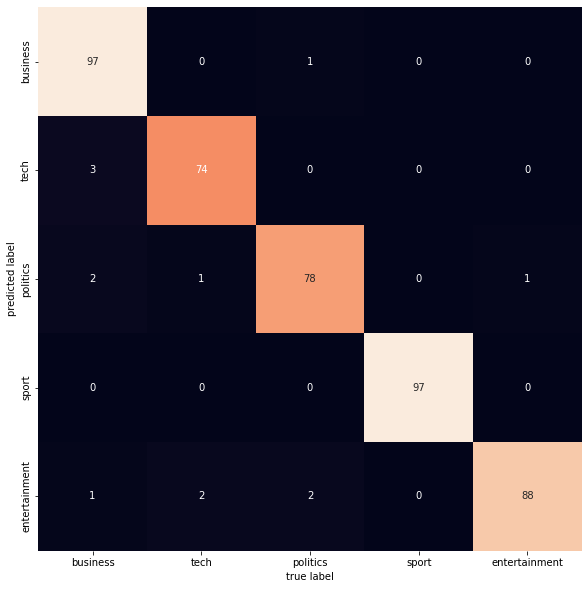

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=unique_category.Category, yticklabels=unique_category.Category)

plt.xlabel('true label')
plt.ylabel('predicted label');

## Predict News Article

In [25]:
y_pred1 = cv.transform(['Business refers to an enterprising entity or organization that carries out professional activities. '])
yy = mdl.predict(y_pred1)
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Tech News"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "Sports News"
elif yy == [4]:
    result = "Entertainment News"
print(result)

Business News


In [26]:
import math
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.classes = set()
        self.vocab = set()
        self.class_word_counts = defaultdict(lambda: defaultdict(int))
        self.class_counts = defaultdict(int)
        self.total_documents = 0

    def train(self, documents, labels):
        self.total_documents = len(documents)

        for document, label in zip(documents, labels):
            self.classes.add(label)
            self.class_counts[label] += 1

            for word in document:
                self.vocab.add(word)
                self.class_word_counts[label][word] += 1

    def predict(self, document):
        scores = defaultdict(float)

        for label in self.classes:
            log_class_prob = math.log(self.class_counts[label] / self.total_documents)

            for word in document:
                if word in self.vocab:
                    log_word_prob = math.log((self.class_word_counts[label][word] + 1) / (sum(self.class_word_counts[label].values()) + len(self.vocab)))
                    scores[label] += log_word_prob
                else:
                    log_word_prob = math.log(1 / (sum(self.class_word_counts[label].values()) + len(self.vocab)))
                    scores[label] += log_word_prob

            scores[label] += log_class_prob

        return max(scores, key=scores.get)


classifier = NaiveBayesClassifier()
classifier.train(x_train,y_train)

predicted_label = [classifier.predict(document) for document in x_test]

accuracy2 = round(accuracy_score(y_test, predicted_label) * 100, 2)

print(accuracy2)


31.77


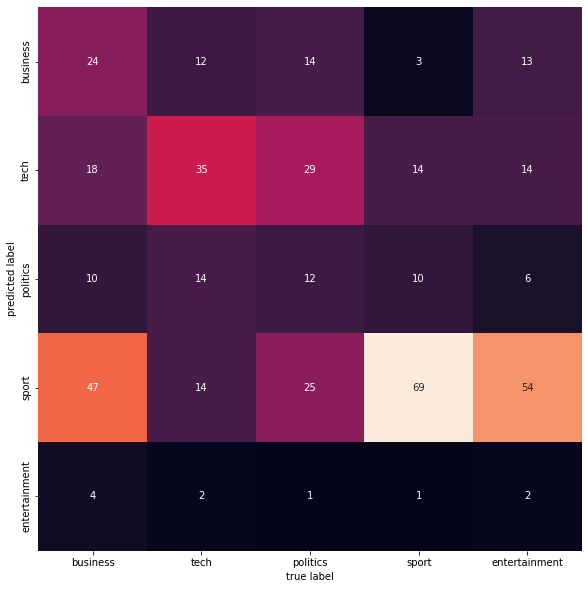

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predicted_label)
plt.figure(figsize = (10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=unique_category.Category, yticklabels=unique_category.Category)

plt.xlabel('true label')
plt.ylabel('predicted label');